In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("Iris.csv")
df=data.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.drop("Id",axis=1,inplace=True)

In [7]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
df[["Species"]] = df[["Species"]].apply(LabelEncoder().fit_transform)

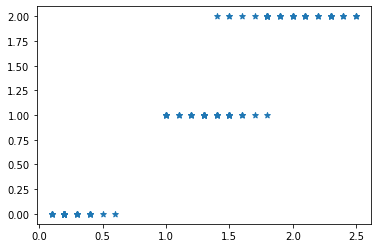

In [9]:
plt.scatter(df["PetalWidthCm"],df["Species"],marker="*")

<AxesSubplot:>

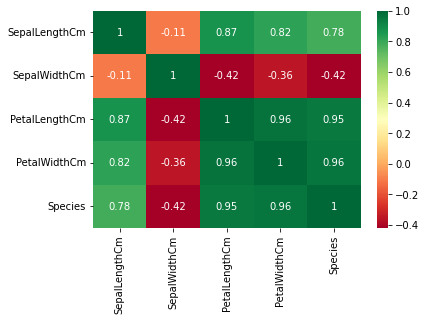

In [10]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

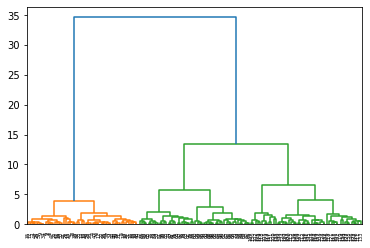

In [12]:
linkage_data = linkage(df, method='ward', metric='euclidean')
dendrogram(linkage_data);

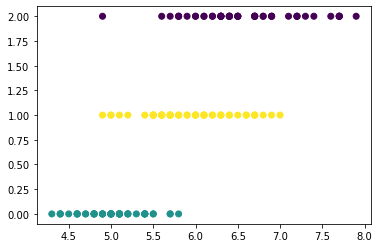

In [13]:
from sklearn.cluster import AgglomerativeClustering


hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df)

plt.scatter(df["SepalLengthCm"], df["Species"], c=labels)
plt.show()

In [14]:
labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

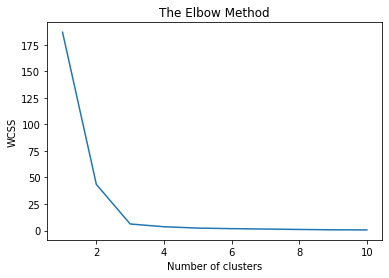

In [15]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df.iloc[:, [3, 4]].values)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df.iloc[:, [3, 4]].values)
    silhouette_avg = silhouette_score(df.iloc[:, [3, 4]].values, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7148845138324365
For n_clusters = 3 The average silhouette_score is : 0.8290233295030082
For n_clusters = 4 The average silhouette_score is : 0.7809318707832053
For n_clusters = 5 The average silhouette_score is : 0.7065449661286558
For n_clusters = 6 The average silhouette_score is : 0.6996370601553455
For n_clusters = 7 The average silhouette_score is : 0.638478060909792
For n_clusters = 8 The average silhouette_score is : 0.6636252582368387


In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df.iloc[:, [3, 4]].values)

In [18]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
kmeans.cluster_centers_

array([[2.026, 2.   ],
       [0.244, 0.   ],
       [1.326, 1.   ]])

In [20]:
X=df.iloc[:, [3, 4]].values

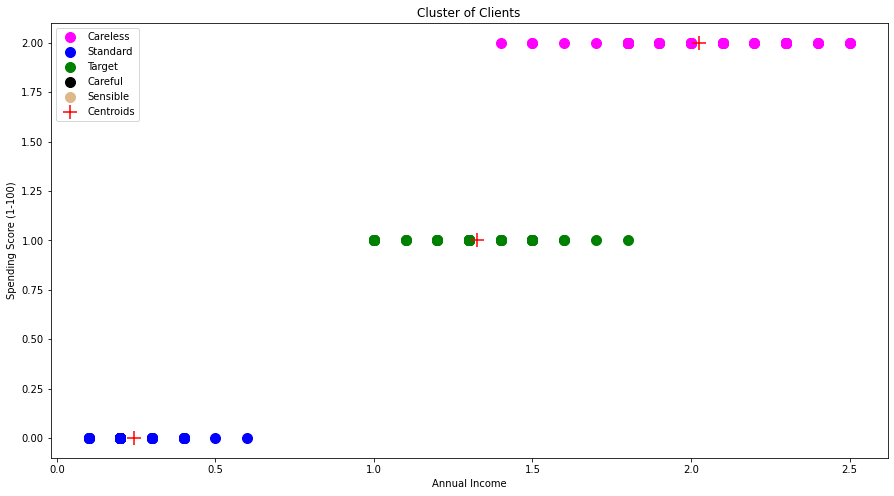

In [21]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Careless')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='Careful')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [22]:
x1=df["PetalWidthCm"]
x2=df["SepalLengthCm"]

In [23]:
cluster_data=pd.DataFrame({"x1":x1,"x2":x2})
cluster_data

,x1,x2
0,0.2,5.1
1,0.2,4.9
2,0.2,4.7
3,0.2,4.6
4,0.2,5.0
...,...,...
145,2.3,6.7
146,1.9,6.3
147,2.0,6.5
148,2.3,6.2


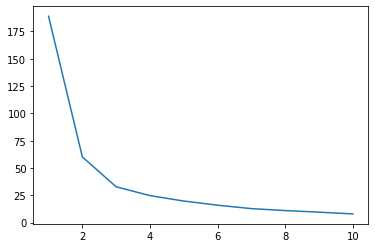

In [24]:
wcss2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(cluster_data)
    wcss2.append(kmeans.inertia_)

plt.plot(range(1,11),wcss2)

In [25]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(cluster_data)
    silhouette_avg = silhouette_score(cluster_data, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5568873645263335
For n_clusters = 3 The average silhouette_score is : 0.5038084349528075
For n_clusters = 4 The average silhouette_score is : 0.4632431435737478
For n_clusters = 5 The average silhouette_score is : 0.47177633692020293
For n_clusters = 6 The average silhouette_score is : 0.42237005513408316
For n_clusters = 7 The average silhouette_score is : 0.4278964836720537
For n_clusters = 8 The average silhouette_score is : 0.39812237656063015


In [26]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_data)

In [27]:
df['cluster']=y_kmeans

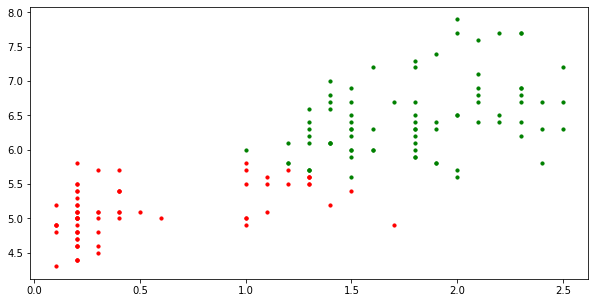

In [28]:
fig = plt.figure(figsize = (10,5))
plt.scatter(cluster_data['x1'][y_kmeans==0],cluster_data['x2'][y_kmeans==0],s=10,c='green',label='Normal')
plt.scatter(cluster_data['x1'][y_kmeans==1],cluster_data['x2'][y_kmeans==1],s=10,c='red',label='Anormal')

In [29]:

h_c = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster_hc = h_c.fit_predict(cluster_data)

df["hc_cluster"] = cluster_hc

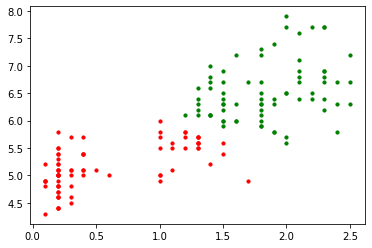

In [30]:
plt.scatter(cluster_data['x1'][cluster_hc==1],cluster_data['x2'][cluster_hc==1],s=10,c='green',label='Normal')
plt.scatter(cluster_data['x1'][cluster_hc==0],cluster_data['x2'][cluster_hc==0],s=10,c='red',label='Anormal')


In [31]:


#Let's we calculate accuracy.
data["Species1"] = [1 if each == "Iris-setosa" else 0 for each in data["Species"]]
actual_class=data["Species1"]
predicted_class=df['hc_cluster']
#data_ac_class = data_ac["Species"]
#predict_class = data["label"]
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class)))/100))

accuracy is : 0.9917333333333334


In [32]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [33]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,hc_cluster
0,5.1,3.5,1.4,0.2,0,1,0
1,4.9,3.0,1.4,0.2,0,1,0
2,4.7,3.2,1.3,0.2,0,1,0
3,4.6,3.1,1.5,0.2,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,1
146,6.3,2.5,5.0,1.9,2,0,1
147,6.5,3.0,5.2,2.0,2,0,1
148,6.2,3.4,5.4,2.3,2,0,1


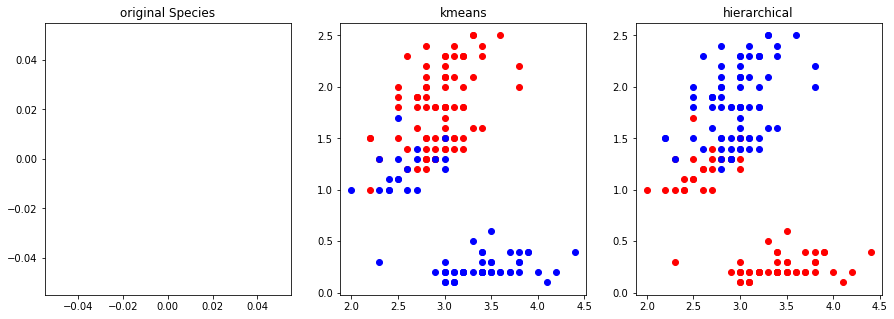

In [34]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
plt.scatter(x = df[df["Species"] == "Iris-setosa"].SepalWidthCm , y = df[df["Species"] == "Iris-setosa"].PetalWidthCm,color = "r")
plt.scatter(x = df[df["Species"] == "Iris-versicolor"].SepalWidthCm , y = df[df["Species"] == "Iris-versicolor"].PetalWidthCm,color = "b")
plt.scatter(x = df[df["Species"] == "Iris-virginica"].SepalWidthCm , y = df[df["Species"] == "Iris-virginica"].PetalWidthCm,color = "g")
plt.title("original Species")

plt.subplot(1, 3, 2)
plt.scatter(x = df[df.cluster == 0].SepalWidthCm,y = df[df.cluster == 0].PetalWidthCm , color = "r")
plt.scatter(x = df[df.cluster == 1].SepalWidthCm,y = df[df.cluster == 1].PetalWidthCm , color = "b")
plt.scatter(x = df[df.cluster == 2].SepalWidthCm,y = df[df.cluster == 2].PetalWidthCm , color = "g")
plt.title("kmeans") 

plt.subplot(1, 3, 3)
plt.scatter(x = df[df.hc_cluster == 0].SepalWidthCm,y = df[df.hc_cluster == 0].PetalWidthCm , color = "r")
plt.scatter(x = df[df.hc_cluster == 1].SepalWidthCm,y = df[df.hc_cluster == 1].PetalWidthCm , color = "b")
plt.scatter(x = df[df.hc_cluster == 2].SepalWidthCm,y = df[df.hc_cluster == 2].PetalWidthCm , color = "g")
plt.title("hierarchical")

plt.show()

In [52]:
import seaborn as sns


<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

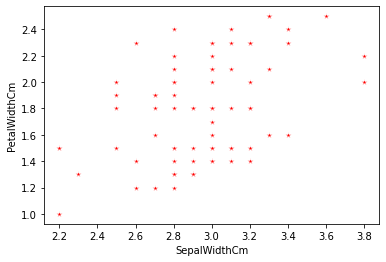

In [58]:

sns.scatterplot(x = df[df.cluster == 0].SepalWidthCm,y = df[df.cluster == 0].PetalWidthCm , color = "r", marker="*")

In [37]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [38]:
x=df.drop("Species",axis=1)
y=df["Species"]

In [39]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [40]:
explained_variance

array([0.90925584, 0.05067496])

In [41]:
X_train

array([[ 1.95191448, -0.04322564],
       [ 0.27817413,  0.69604757],
       [-2.72837368, -0.40579267],
       [ 1.36183555,  0.06126214],
       [ 2.19215393,  0.23464753],
       [-0.29788141,  0.87264372],
       [-2.37294766, -0.86142092],
       [ 1.44042158,  0.36421253],
       [ 0.61485796, -0.02010041],
       [ 0.1371891 ,  0.4491874 ],
       [ 2.20425223, -0.18319751],
       [-3.049141  ,  0.05979282],
       [ 1.97544738, -0.39297236],
       [-2.57887458, -0.22089272],
       [-2.67075238, -0.66860945],
       [-0.78795134,  1.35314063],
       [ 1.99397275, -0.03231803],
       [ 2.45104758, -0.24745171],
       [ 1.35714872,  0.68547505],
       [ 2.34316041,  0.27668188],
       [-0.24687203,  0.74408645],
       [ 3.08287914, -0.55811517],
       [ 1.1800492 , -0.34176757],
       [-0.3574159 ,  0.85092461],
       [ 1.45257592,  0.15423535],
       [ 1.50544246,  0.10234612],
       [ 0.20343828,  1.37300399],
       [ 1.58221546,  0.33107881],
       [ 1.36539684,

In [42]:
X_test

array([[ 1.64019844,  0.49321318],
       [ 0.16523588,  0.59340414],
       [-2.7501702 , -1.10922007],
       [ 2.93793806, -0.2466013 ],
       [-2.79261879, -0.21413389],
       [ 2.5545094 ,  0.06726056],
       [-2.92805035, -0.32447512],
       [ 1.30037597, -0.45041038],
       [ 1.40275639, -0.28257377],
       [ 0.46619066, -0.06734013],
       [ 1.82182858,  0.47805683],
       [ 1.02398232, -0.38995767],
       [ 1.00366454,  0.09469427],
       [ 1.16764526, -0.14100583],
       [ 1.06635812,  0.04345074],
       [-2.84284052,  0.04963327],
       [ 0.90211591,  0.0645179 ],
       [ 0.15439452,  0.86598724],
       [-2.88406699,  0.17638589],
       [-2.77814906, -0.84015145],
       [ 1.26722827,  0.52474456],
       [ 0.55246715,  0.43777905],
       [-2.53655482,  0.00464783],
       [-3.05383973,  0.47858823],
       [ 1.32878442,  0.11875751],
       [-3.35627039, -0.23829948],
       [-2.38742928, -0.44082087],
       [ 0.74020099, -0.12503782],
       [-0.97128922,

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [44]:
classifier.score(X_train, y_train)

0.9583333333333334

In [45]:
classifier.score(X_test, y_test)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


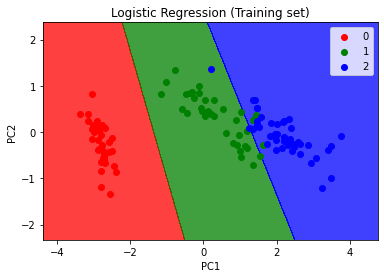

In [46]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


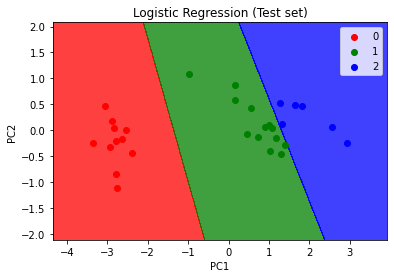

In [47]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()